## Global Horizontal Irradiance (GHI)
>### The radiation reaching the earth's surface can be represented in a number of different ways. Global Horizontal Irradiance (GHI) is the total amount of shortwave radiation received from above by a surface horizontal to the ground.

### Task: Given Half hourly features for 2018 and 2019 Predict the GHI generated after 48 hours

In [1]:
!pip install pycaret

     |████████████████████████████████| 261 kB 1.2 MB/s 
     |████████████████████████████████| 24.2 MB 27.8 MB/s 
     |████████████████████████████████| 14.2 MB 50.7 MB/s 
     |████████████████████████████████| 6.8 MB 32.1 MB/s 
     |████████████████████████████████| 102 kB 62.0 MB/s 
     |████████████████████████████████| 167 kB 47.5 MB/s 
     |████████████████████████████████| 1.1 MB 24.7 MB/s 
     |████████████████████████████████| 79 kB 5.5 MB/s 
     |████████████████████████████████| 54 kB 1.7 MB/s 
     |████████████████████████████████| 1.7 MB 48.3 MB/s 
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ | done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 1.7 MB 35.9 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=7966a96889de4807acf56d606aea209c4bd2dac6f0ac978560c4a2ea9ab6f9b8
  S

In [2]:
import pandas as pd 
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(color_codes=True)
pal = sns.color_palette("viridis", 10)
sns.set_palette(pal)

In [3]:
df = pd.read_csv('../input/weather-data/combined_data_from_2016_2019_with_out_extra_features.csv')

In [4]:
df.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,1,2.2,177.77,0,0.17,1.1,1.2,167,40.16,15.7,974
1,2016,1,1,1,0,0,0,1,2.5,163.98,0,0.17,1.2,1.2,179,43.10,15.0,974
2,2016,1,1,2,0,0,0,1,2.8,150.22,0,0.17,1.2,1.2,188,44.81,14.7,974
3,2016,1,1,3,0,0,0,1,3.1,136.54,0,0.17,1.2,1.2,197,46.20,14.5,974
4,2016,1,1,4,0,0,0,1,3.3,122.99,0,0.17,1.2,1.2,201,48.00,14.2,974


## Checking for null values

In [5]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
GHI                   0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Fill Flag             0
Surface Albedo        0
Wind Speed            0
Precipitable Water    0
Wind Direction        0
Relative Humidity     0
Temperature           0
Pressure              0
dtype: int64

### No null values

In [6]:
df.shape

(52584, 18)

In [7]:
df.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,1,2.2,177.77,0,0.17,1.1,1.2,167,40.16,15.7,974
1,2016,1,1,1,0,0,0,1,2.5,163.98,0,0.17,1.2,1.2,179,43.10,15.0,974
2,2016,1,1,2,0,0,0,1,2.8,150.22,0,0.17,1.2,1.2,188,44.81,14.7,974
3,2016,1,1,3,0,0,0,1,3.1,136.54,0,0.17,1.2,1.2,197,46.20,14.5,974
4,2016,1,1,4,0,0,0,1,3.3,122.99,0,0.17,1.2,1.2,201,48.00,14.2,974


### Constructing Future GHI Feature(after 48 h)

In [8]:
l=[]
for i in range (96,df.shape[0]):
    l.append(df['GHI'][i])
    
df.drop(list(range(df.shape[0]-96,df.shape[0])),inplace=True)
df['GHI_after_48_hours'] = l

In [9]:
df=df[df['Year']>2017]

In [10]:
df

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,GHI_after_48_hours
17544,2018,1,1,0,0,0,0,0,-10.1,166.39,0,0.17,1.5,0.6,4,26.75,7.9,948,0
17545,2018,1,1,0,30,0,0,0,-10.1,163.50,0,0.17,1.5,0.6,181,27.68,7.4,948,0
17546,2018,1,1,1,0,0,0,0,-9.5,158.96,0,0.17,1.6,0.6,357,30.04,6.9,948,0
17547,2018,1,1,1,30,0,0,0,-9.5,153.61,0,0.17,1.6,0.6,356,30.87,6.5,948,0
17548,2018,1,1,2,0,0,0,0,-8.8,147.87,0,0.17,1.6,0.6,354,33.18,6.2,948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52483,2019,12,29,21,30,0,0,7,-7.0,148.57,0,0.17,0.6,1.2,173,46.15,3.5,945,0
52484,2019,12,29,22,0,0,0,4,-6.8,154.29,0,0.17,0.7,1.2,1,47.47,3.3,945,0
52485,2019,12,29,22,30,0,0,7,-6.8,159.60,0,0.17,0.8,1.2,7,47.81,3.2,945,0
52486,2019,12,29,23,0,0,0,7,-6.3,164.05,0,0.17,0.9,1.2,13,50.60,3.0,945,0


In [11]:
l=[]
for i in df['Minute']:
    if i ==30:
        l.append(0.5)
    else:
        l.append(0)
        
df['Hour'] = df['Hour']+l

In [12]:
df.drop(['Clearsky GHI','GHI','Minute'],axis=1,inplace=True)

## Check Corelation

<AxesSubplot:>

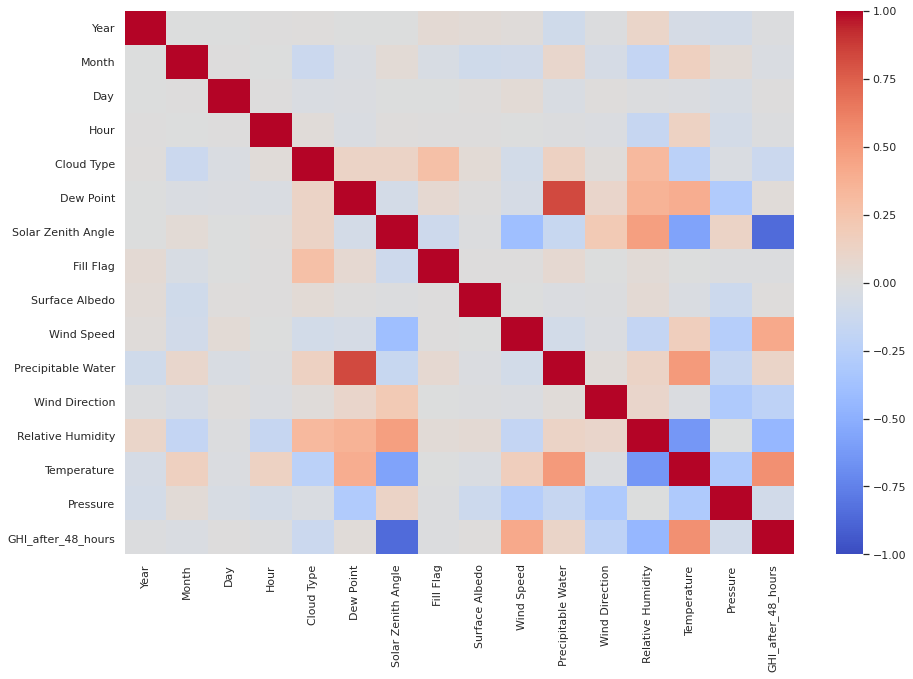

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data= df.corr(), vmin=-1,vmax=1, cmap='coolwarm')

<AxesSubplot:xlabel='Hour', ylabel='GHI_after_48_hours'>

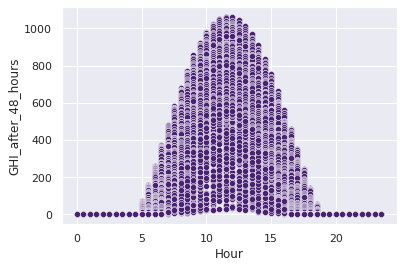

In [14]:
sns.scatterplot(x='Hour',y='GHI_after_48_hours',data=df)

Text(0.5, 1.0, 'Avg Future Hourly00 GHI in different Months')

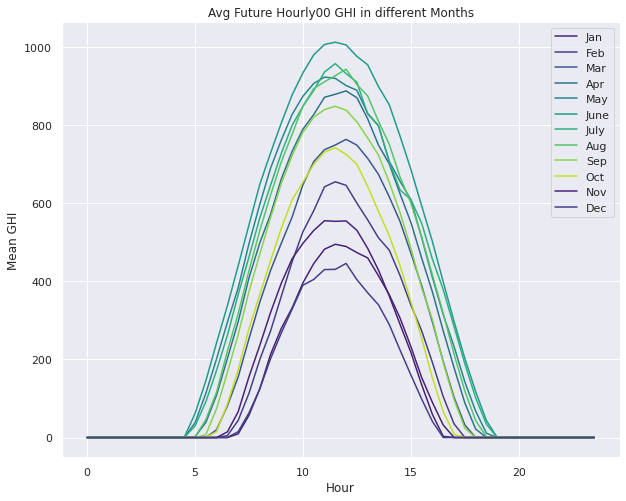

In [15]:
plt.figure(figsize=(10,8))
df[df.Month==1].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Jan')
df[df.Month==2].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Feb')
df[df.Month==3].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Mar')
df[df.Month==4].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Apr')
df[df.Month==5].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='May')
df[df.Month==6].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='June')
df[df.Month==7].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='July')
df[df.Month==8].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Aug')
df[df.Month==9].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Sep')
df[df.Month==10].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Oct')
df[df.Month==11].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Nov')
df[df.Month==12].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Dec')
plt.legend()
plt.title('Avg Future Hourly00 GHI in different Months')

### Month

<AxesSubplot:xlabel='Month', ylabel='GHI_after_48_hours'>

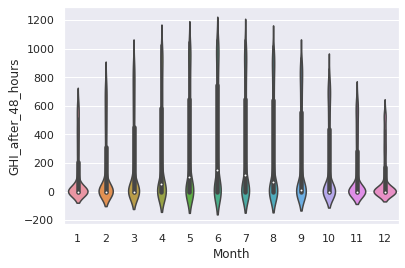

In [16]:
sns.violinplot(data=df,x='Month',y='GHI_after_48_hours')

### Month of July showing more 0 and lower values because of possible rainy season and CLOUD cover

<AxesSubplot:xlabel='Month'>

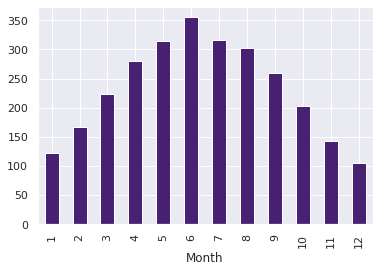

In [17]:
df.groupby('Month').GHI_after_48_hours.mean().plot(kind='bar')

### Trends over the years

<AxesSubplot:title={'center':'2018'}, xlabel='Month'>

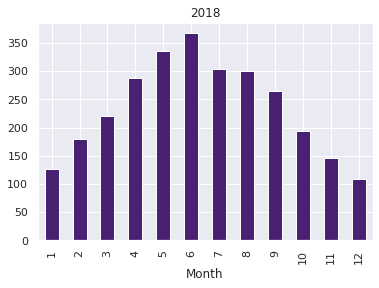

In [18]:
df[df['Year']==2018].groupby('Month').GHI_after_48_hours.mean().plot(kind='bar',title='2018')

<AxesSubplot:title={'center':'2019'}, xlabel='Month'>

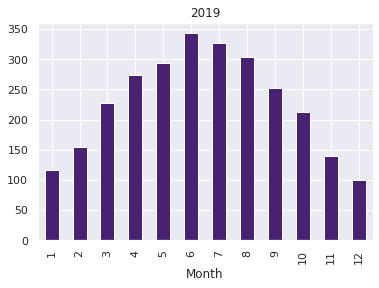

In [19]:
df[df['Year']==2019].groupby('Month').GHI_after_48_hours.mean().plot(kind='bar',title='2019')

### So over the years the highest mean GHI is recorded in June-July and lowest in December and January

## Cloud Type

<AxesSubplot:ylabel='Cloud Type'>

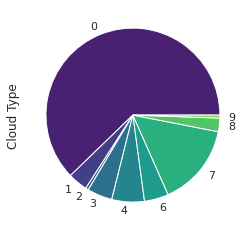

In [20]:
df.groupby('Cloud Type')['Cloud Type'].count().plot(kind='pie')

<AxesSubplot:xlabel='Cloud Type', ylabel='Frequency'>

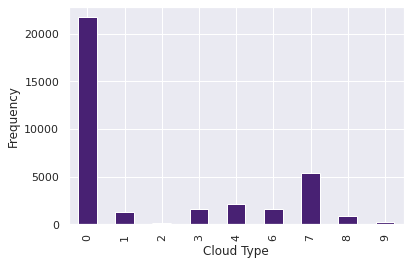

In [21]:
df.groupby('Cloud Type')['Cloud Type'].count().plot(kind='bar',ylabel='Frequency')

<AxesSubplot:xlabel='Cloud Type', ylabel='Mean GHI'>

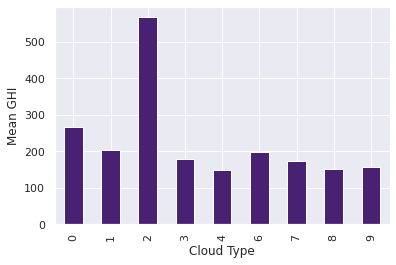

In [22]:
df.groupby('Cloud Type').GHI_after_48_hours.mean().plot(kind='bar',ylabel='Mean GHI')

> ### Cloud Type 2 is impacting the GHI very much

<AxesSubplot:xlabel='Cloud Type', ylabel='GHI_after_48_hours'>

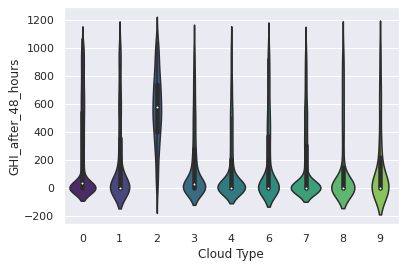

In [23]:
sns.violinplot(data=df,x='Cloud Type',y='GHI_after_48_hours')

> ### cloud type 2 has more impact on future GHI values 

## DEW POINT

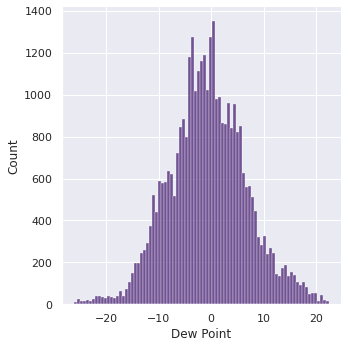

In [24]:
sns.displot(kind='hist', data=df, x= 'Dew Point')

<AxesSubplot:xlabel='Month', ylabel='Dew Point'>

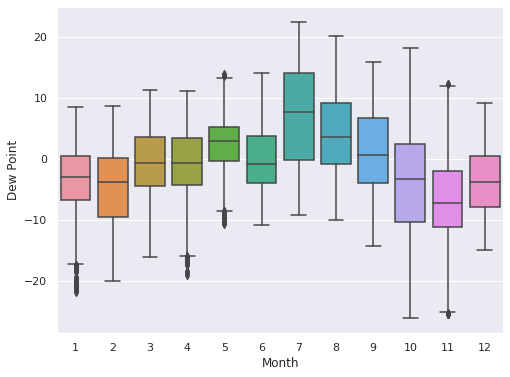

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='Month', y='Dew Point')

In [26]:
df.groupby('Dew Point').GHI_after_48_hours.mean().sort_values(ascending=False).head(20)

Dew Point
 19.2    897.250000
-21.0    737.500000
-25.7    688.500000
-16.4    675.500000
-24.5    659.000000
-23.2    640.250000
-24.7    636.000000
 20.5    628.500000
-23.1    618.500000
 18.6    593.166667
-24.1    571.500000
-16.0    560.800000
-16.7    530.100000
-18.2    521.500000
 12.8    514.708333
-15.5    511.545455
-23.5    506.000000
 13.0    505.545455
-16.3    503.125000
 16.7    482.562500
Name: GHI_after_48_hours, dtype: float64

> ### Negative Dew Points tend to give High GHI after 48 Hours

## Solar Zenith Angle

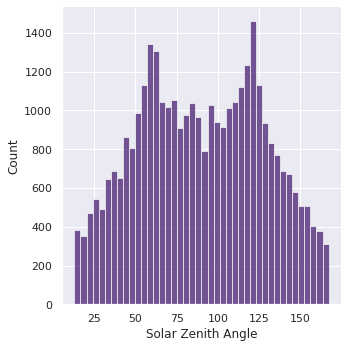

In [27]:
sns.displot(kind='hist',data=df, x='Solar Zenith Angle')

In [28]:
df.groupby('Solar Zenith Angle')['GHI_after_48_hours'].mean().sort_values(ascending=False).head(10)

Solar Zenith Angle
13.15    1063.0
13.54    1062.0
14.83    1061.0
14.09    1060.0
14.97    1060.0
14.98    1059.0
13.11    1058.0
13.29    1053.5
14.03    1053.0
13.30    1051.5
Name: GHI_after_48_hours, dtype: float64

> ### 13-14 degrees has high impact

## Fill Flag

<AxesSubplot:ylabel='Fill Flag'>

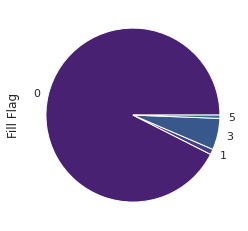

In [29]:
df.groupby('Fill Flag')['Fill Flag'].count().plot(kind='pie')

<AxesSubplot:xlabel='Fill Flag', ylabel='Mean GHI'>

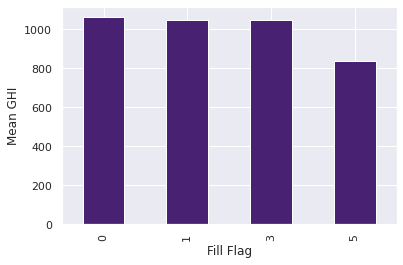

In [30]:
df.groupby('Fill Flag').GHI_after_48_hours.max().plot(kind='bar',ylabel='Mean GHI')

<AxesSubplot:xlabel='Fill Flag', ylabel='GHI_after_48_hours'>

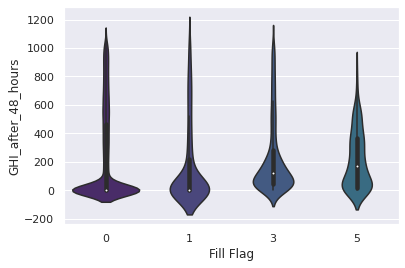

In [31]:
sns.violinplot(data=df,x='Fill Flag',y='GHI_after_48_hours')

## Surface Albedo

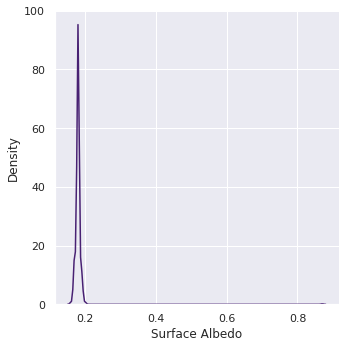

In [32]:
sns.displot(kind='kde',data=df,x='Surface Albedo')

<AxesSubplot:ylabel='Surface Albedo'>

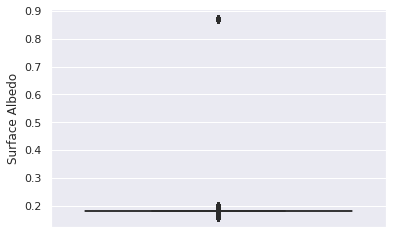

In [33]:
sns.boxplot(data=df,y='Surface Albedo')

### As we can see due to skewed data it is showing noisy outliers

## Wind Speed

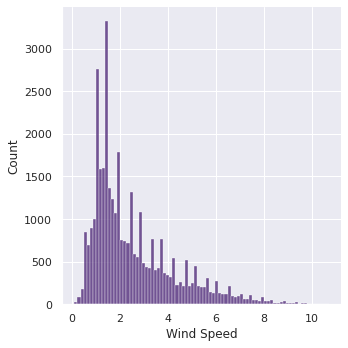

In [34]:
sns.displot(kind='hist',data=df,x='Wind Speed')

<AxesSubplot:ylabel='Wind Speed'>

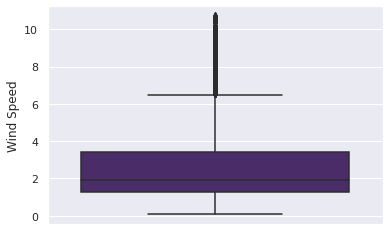

In [35]:
sns.boxplot(data=df, y='Wind Speed')

<AxesSubplot:xlabel='Month', ylabel='Wind Speed'>

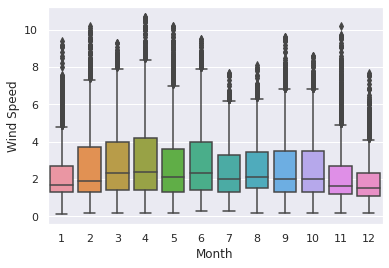

In [36]:
sns.boxplot(data=df, x='Month',y='Wind Speed')

## Precipitable Water

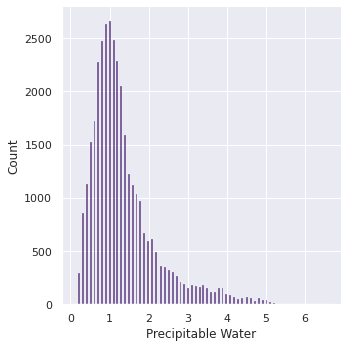

In [37]:
sns.displot(kind='hist',data=df,x='Precipitable Water')

<AxesSubplot:ylabel='Precipitable Water'>

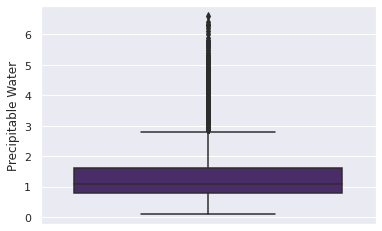

In [38]:
sns.boxplot(data=df,y='Precipitable Water')

<AxesSubplot:xlabel='Month', ylabel='Precipitable Water'>

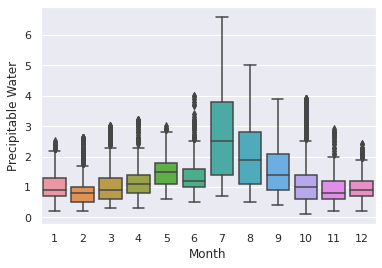

In [39]:
sns.boxplot(data=df,y='Precipitable Water',x='Month')

> ### As Expected Most precioitation in July 

## Wind Direction

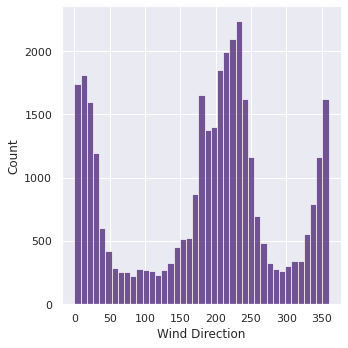

In [40]:
sns.displot(data=df,kind='hist',x='Wind Direction')

In [41]:
df.groupby('Wind Direction')['GHI_after_48_hours'].mean().sort_values(ascending=False).head(10)

Wind Direction
143    552.866667
161    534.089286
152    524.049180
153    510.500000
129    501.909091
155    497.083333
133    496.775000
130    495.916667
140    494.257143
157    494.145833
Name: GHI_after_48_hours, dtype: float64

### Top 10 Mean GHI Forecast Recorded with **130-150** angles

## Relative Humidity

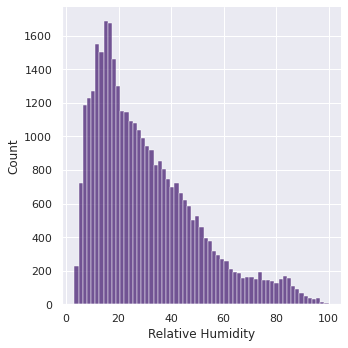

In [42]:
sns.displot(kind='hist',data=df,x='Relative Humidity')

<AxesSubplot:ylabel='Relative Humidity'>

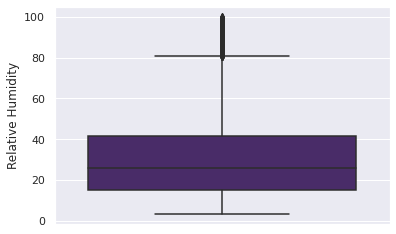

In [43]:
sns.boxplot(data=df,y='Relative Humidity')

<AxesSubplot:xlabel='Month', ylabel='Relative Humidity'>

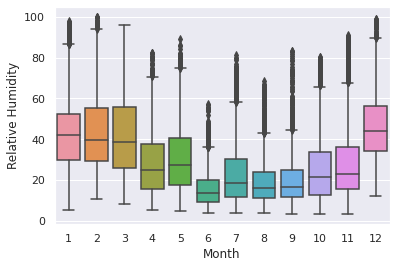

In [44]:
sns.boxplot(data=df,x='Month',y='Relative Humidity')

In [45]:
df.groupby('Relative Humidity')['GHI_after_48_hours'].mean().sort_values(ascending=False).head(10)

Relative Humidity
4.36    1049.000000
6.63    1044.333333
3.78    1040.000000
5.21    1036.000000
4.32    1028.000000
4.23    1025.000000
3.95    1021.000000
5.78    1012.666667
5.23    1011.000000
4.94     989.000000
Name: GHI_after_48_hours, dtype: float64

> ### This Shows That Lower Humidities will Have positive impact on GHI in Future

## Temperature

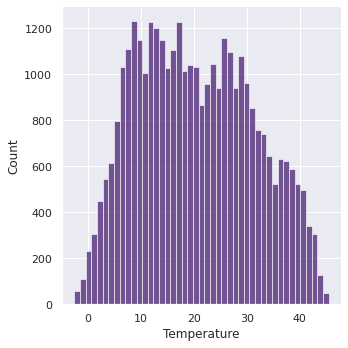

In [46]:
sns.displot(data=df,kind='hist',x='Temperature')

<AxesSubplot:ylabel='Temperature'>

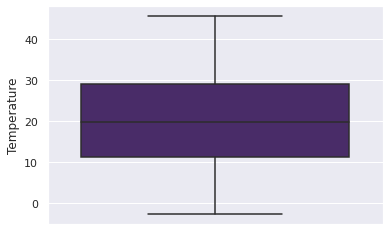

In [47]:
sns.boxplot(data = df,y = 'Temperature')

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

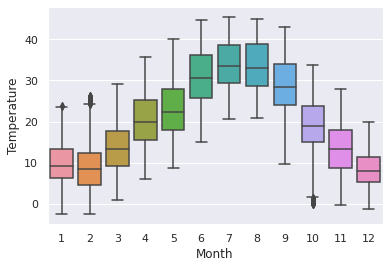

In [48]:
sns.boxplot(data = df,x='Month',y = 'Temperature')

### As You can see Tempertur trend is Normal, Most fluctuations are in July due to Monsoons

In [49]:
df.groupby('Temperature')['GHI_after_48_hours'].mean().sort_values(ascending=False).head(10)

Temperature
44.3    911.333333
43.7    894.538462
45.2    880.666667
45.1    863.333333
43.3    863.181818
43.8    844.230769
44.1    837.000000
42.7    825.333333
42.3    804.703704
42.5    800.961538
Name: GHI_after_48_hours, dtype: float64

### Higher Temperatures are mainly responsible for higher GHI, which is as expected, 
### Thats why Most GHI is recorede in May-April because those months recorded highest avg Temperatures

## Pressure

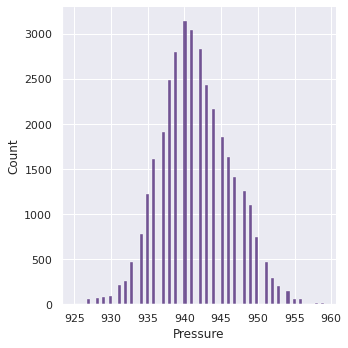

In [50]:
sns.displot(data=df,x='Pressure',kind='hist')

<AxesSubplot:title={'center':'Mean GHI vs Pressure'}, xlabel='Pressure', ylabel='Mean GHI'>

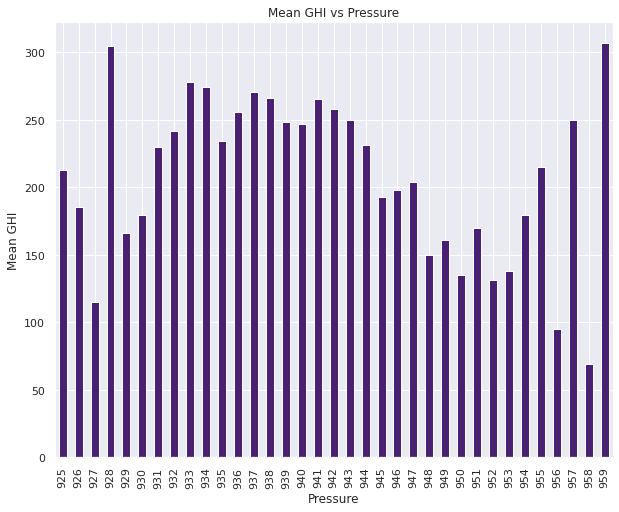

In [51]:
plt.figure(figsize=(10,8))
df.groupby('Pressure')['GHI_after_48_hours'].mean().plot(kind='bar',ylabel='Mean GHI',title='Mean GHI vs Pressure')

### EDA Finished

# Model Building 

### For Model building and Selection we will use automated Library Pycaret 🥕

### Setup (Dividing the dataset into 50-50 test train ratio for efficient results)

In [52]:

X = df.drop(['Year'],axis=1)
y= df['GHI_after_48_hours']
X_train,  X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.5)

### Further dividing the train set into train and dev set into 80-20 ratio

In [53]:
from pycaret.regression import *
log = setup(data=X_train, target='GHI_after_48_hours',train_size=0.8,
            silent=True, feature_selection=True, create_clusters=True)

,Description,Value
0,session_id,8109
1,Target,GHI_after_48_hours
2,Original Data,"(17472, 15)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13977, 37)"


### Model Selection

In [54]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,31.6204,4528.6797,67.0550,0.9552,1.1257,0.3908,4.5230
xgboost,Extreme Gradient Boosting,33.2275,5102.5675,71.1411,0.9495,1.0404,0.3940,27.2130
lightgbm,Light Gradient Boosting Machine,32.6563,5179.3223,71.7228,0.9487,0.7158,0.4186,0.2380
et,Extra Trees Regressor,35.1474,6300.9677,79.2529,0.9376,0.3399,0.4489,2.0080
rf,Random Forest Regressor,36.1111,6353.9851,79.5794,0.9371,0.3346,0.4540,3.4540
gbr,Gradient Boosting Regressor,38.4563,6692.9616,81.6430,0.9337,0.9943,0.4630,1.2870
knn,K Neighbors Regressor,38.7257,6975.2785,83.3642,0.9310,0.6548,0.5045,0.0980
dt,Decision Tree Regressor,43.7370,11830.6466,108.5798,0.8830,0.4563,0.5007,0.0770
ada,AdaBoost Regressor,60.7620,12050.2830,109.5317,0.8808,0.7252,0.5283,0.2360
br,Bayesian Ridge,118.1378,21883.0602,147.9095,0.7837,3.1035,1.2574,0.0380


> ## Catboost Regressor is the Most accurate model according to R2 value

### Building individual and Blend of top 

In [55]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30.0249,3928.7344,62.6796,0.9608,1.1211,0.3704
1,30.7234,3850.3222,62.0510,0.9626,1.1161,0.3633
2,30.6405,4605.7927,67.8660,0.9547,1.1187,0.3947
3,31.7666,4979.0516,70.5624,0.9501,1.1563,0.4360
4,32.8088,4912.5309,70.0894,0.9527,1.1389,0.4656
5,33.6050,5507.9310,74.2154,0.9428,1.1240,0.4017
6,33.7667,5660.6090,75.2370,0.9427,1.1361,0.4525
7,33.4533,4711.4361,68.6399,0.9558,1.1177,0.4126
8,28.7638,3143.6646,56.0684,0.9687,1.1184,0.2660
9,30.6507,3986.7243,63.1405,0.9610,1.1101,0.3454


In [56]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,31.4120,4751.6992,68.9326,0.9526,0.7578,0.3932
1,31.9131,4447.5059,66.6896,0.9568,0.7185,0.3873
2,31.9564,5289.1436,72.7265,0.9480,0.7470,0.4345
3,32.6083,5588.6752,74.7574,0.9440,0.6570,0.4744
4,32.9414,5341.3482,73.0845,0.9485,0.7189,0.4783
5,34.8882,6473.0122,80.4550,0.9328,0.7026,0.4467
6,35.9747,6585.4906,81.1510,0.9333,0.7538,0.4877
7,32.9729,5048.3727,71.0519,0.9526,0.6905,0.4173
8,28.9862,3659.5822,60.4945,0.9636,0.7061,0.2890
9,32.9099,4608.3937,67.8852,0.9549,0.7057,0.3773


In [57]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,37.7216,6418.2147,80.1138,0.9360,1.0301,0.4555
1,37.6414,5985.0620,77.3632,0.9418,0.9824,0.4495
2,37.9904,6900.1760,83.0673,0.9322,1.0152,0.4768
3,38.7703,7199.2957,84.8487,0.9278,0.9847,0.5351
4,37.5417,6271.0009,79.1897,0.9396,1.0086,0.4922
5,40.0688,7912.2740,88.9510,0.9179,1.0106,0.4726
6,41.4348,8220.4120,90.6665,0.9167,1.0416,0.5367
7,38.7184,6583.6684,81.1398,0.9382,0.9239,0.4485
8,35.8387,5181.1512,71.9802,0.9485,1.0161,0.3269
9,38.8375,6258.3607,79.1098,0.9388,0.9300,0.4358


In [58]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,34.7515,6029.7398,77.6514,0.9399,0.3222,0.4203
1,35.0812,5610.6452,74.9042,0.9455,0.3532,0.4434
2,33.4882,6249.4562,79.0535,0.9386,0.3483,0.4665
3,35.2713,6809.5092,82.5198,0.9318,0.3635,0.5109
4,35.7916,6466.8658,80.4168,0.9377,0.3626,0.4922
5,35.7847,7346.8836,85.7140,0.9237,0.3458,0.4496
6,37.2907,7608.5209,87.2268,0.9229,0.3698,0.5297
7,35.7634,5872.7160,76.6336,0.9449,0.3311,0.4438
8,33.5295,5335.8956,73.0472,0.9469,0.2851,0.3291
9,34.7224,5679.4452,75.3621,0.9444,0.3173,0.4030


In [59]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32.7321,4609.5601,67.8937,0.9540,1.0991,0.3783
1,31.9287,4198.8564,64.7986,0.9592,1.0117,0.3637
2,32.7485,5359.4297,73.2081,0.9473,1.0383,0.4267
3,32.8558,5386.4365,73.3923,0.9460,1.0413,0.4228
4,34.4778,5843.6499,76.4438,0.9437,1.0717,0.4574
5,34.7269,6154.5767,78.4511,0.9361,1.0097,0.4063
6,36.5953,6616.5811,81.3424,0.9330,1.0591,0.4582
7,33.4614,4952.2397,70.3722,0.9535,1.0099,0.3957
8,29.7833,3481.7095,59.0060,0.9654,1.0204,0.2785
9,32.9648,4422.6357,66.5029,0.9567,1.0425,0.3528


## Blend of CatBoost, LGBM , XGB

In [60]:
blender = blend_models(estimator_list=[cb,lgbm,xgb])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30.1690,4180.1152,64.6538,0.9583,0.9237,0.3734
1,30.0518,3879.6190,62.2866,0.9623,0.8672,0.3632
2,30.4292,4784.7753,69.1721,0.9530,0.8806,0.4063
3,31.1824,5044.3307,71.0235,0.9494,0.8894,0.4349
4,32.2941,5091.8529,71.3572,0.9509,0.8972,0.4511
5,33.1827,5760.2820,75.8965,0.9402,0.8524,0.4104
6,34.0194,5936.7170,77.0501,0.9399,0.9010,0.4502
7,31.9625,4617.5258,67.9524,0.9567,0.8604,0.3986
8,27.9123,3171.4226,56.3154,0.9685,0.8715,0.2657
9,30.7326,4060.7030,63.7236,0.9603,0.8779,0.3479


## Stack Model

In [61]:
stacker = stack_models(estimator_list=[cb,lgbm,xgb])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30.1383,3929.8928,62.6889,0.9608,1.1658,0.3716
1,30.2508,3738.7187,61.1451,0.9637,1.1369,0.3538
2,30.2443,4582.8105,67.6965,0.9550,1.1362,0.3935
3,31.4272,4906.2261,70.0445,0.9508,1.1752,0.4227
4,32.9078,4950.7506,70.3616,0.9523,1.1812,0.4693
5,33.6251,5487.7678,74.0795,0.9430,1.1823,0.3959
6,33.7754,5650.2032,75.1678,0.9428,1.1642,0.4492
7,32.7887,4567.4713,67.5831,0.9571,1.1449,0.4066
8,28.4603,3058.6486,55.3051,0.9696,1.1601,0.2551
9,30.4946,3912.1646,62.5473,0.9617,1.1506,0.3401


# Analysing Models

## Catboost

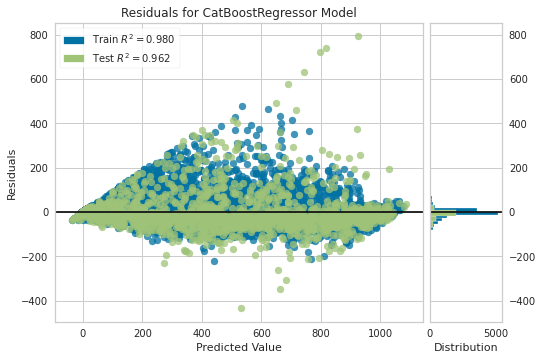

In [62]:
plot_model(cb)

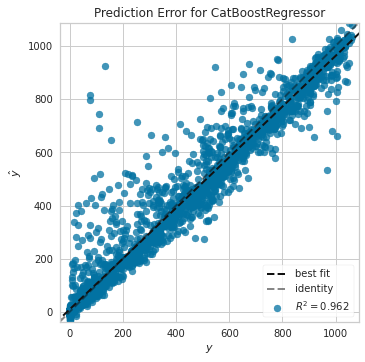

In [63]:
plot_model(cb, plot='error')

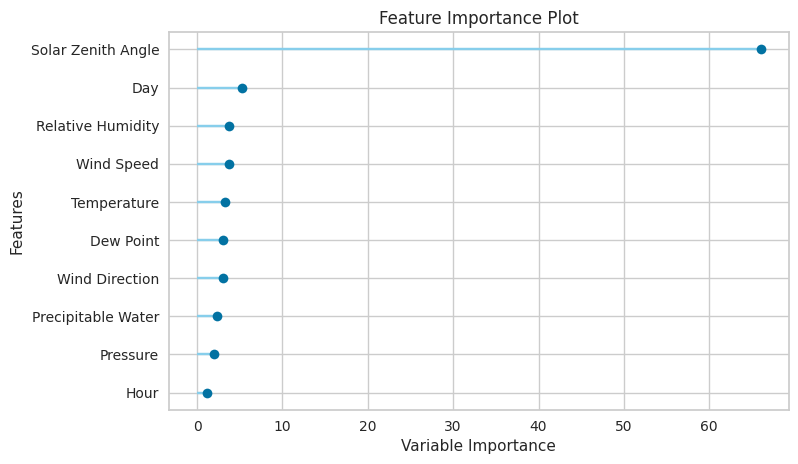

In [64]:
plot_model(cb, plot='feature')

## LGBM

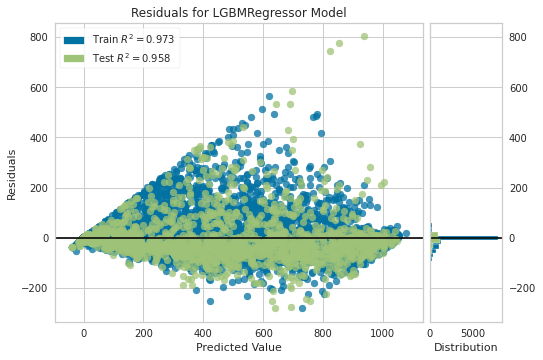

In [65]:
plot_model(lgbm)

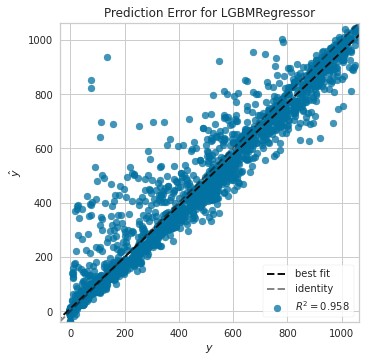

In [66]:
plot_model(lgbm, plot='error')

## GBoost

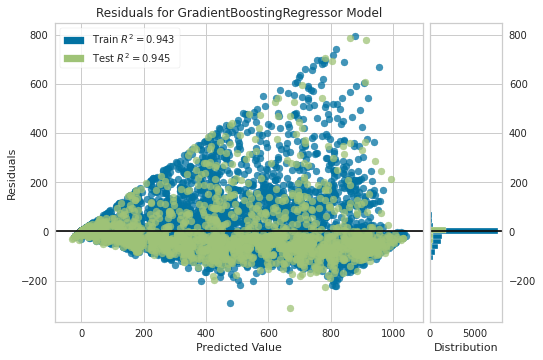

In [67]:
plot_model(gbr)

## XGboost

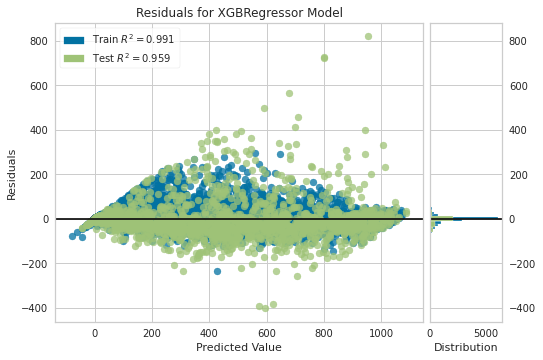

In [68]:
plot_model(xgb)

### It's overfitting train data a little

## Extra Tree

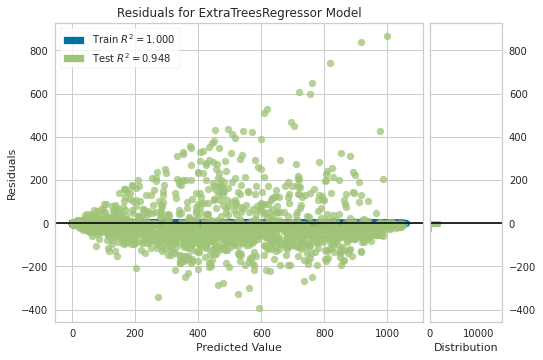

In [69]:
plot_model(et)

### We can see that this model has overfitted the data alot, so we will not use it in Blend or stack Model

## Blender

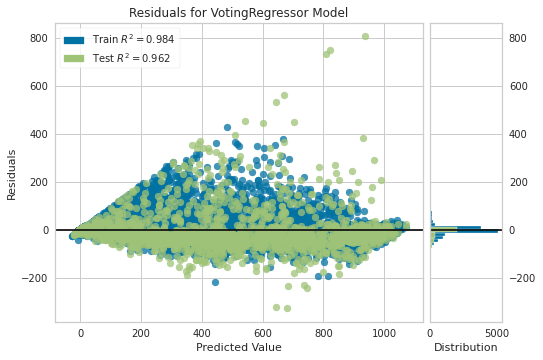

In [70]:
plot_model(blender)

## Stacker

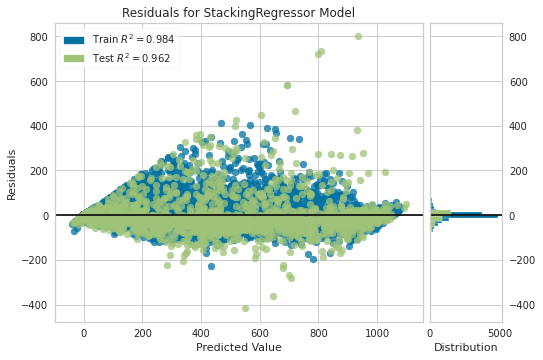

In [71]:
plot_model(stacker)

# Interpreting Model

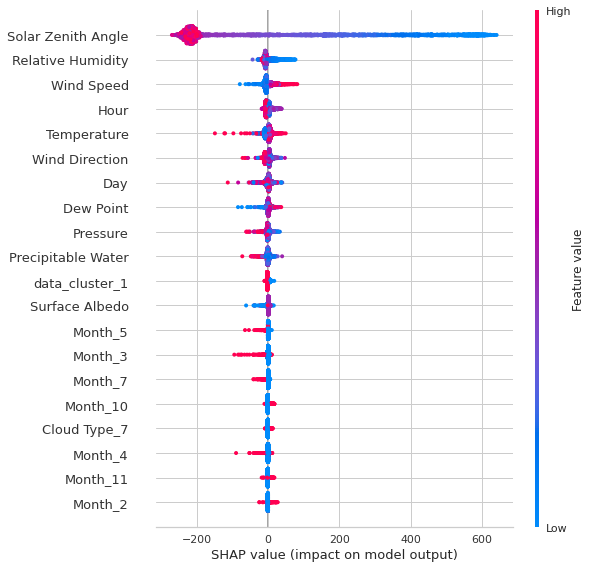

In [72]:
interpret_model(cb)

> ## We can understand with the help of SHAP value how high and low values of a feature affect the predictions

In [73]:
from sklearn.metrics import r2_score
models = [cb,lgbm,gbr,et,xgb,blender,stacker]
models2 = ['cb','lgbm','gbr','et','xgb','blender','stacker']

> ### Training set R2_score

In [74]:
r2=[]
for i in models:
    pred = predict_model(i, data=X_train.drop(['GHI_after_48_hours'],axis=1))
    l=[]
    for j in pred['Label']:
        if j <0:
            l.append(0)
        else:
            l.append(int(j))
        
    pred['Label'] = l

    r2.append(r2_score(X_train['GHI_after_48_hours'],pred['Label']))
    
df3 = pd.DataFrame({'Model':models2, 'Train_R2':r2})

In [75]:
df3.sort_values(by='Train_R2',ascending=False)

,Model,Train_R2
3,et,0.989307
4,xgb,0.984362
6,stacker,0.979948
5,blender,0.979300
0,cb,0.976656
1,lgbm,0.970008
2,gbr,0.943751


> ### Test/Holdout Set R2_score

In [76]:
r2=[]
for i in models:
    pred2 = predict_model(i, data=X_test.drop(['GHI_after_48_hours'],axis=1))
    l=[]
    for j in pred2['Label']:
        if j <0:
            l.append(0)
        else:
            l.append(int(j))
        
    pred2['Label'] = l

    r2.append(r2_score(X_test['GHI_after_48_hours'],pred2['Label']))
    
df3 = pd.DataFrame({'Model':models2, 'Test_R2':r2})

In [77]:
df3.sort_values(by='Test_R2',ascending=False)

,Model,Test_R2
6,stacker,0.957086
0,cb,0.956544
5,blender,0.956032
4,xgb,0.952646
1,lgbm,0.951813
3,et,0.941920
2,gbr,0.938472


> 

### Predicted value comparison

In [78]:
def fun(l):
    new_l=[]
    for j in l:
        if j <0:
            new_l.append(0)
        else:
            new_l.append(int(j))
        
    return new_l

In [79]:
df_comp = pd.DataFrame({'True GHI': X_test['GHI_after_48_hours'],'Predicted GHI':fun(predict_model(stacker,data=X_test.drop(['GHI_after_48_hours'],axis=1))['Label'])})
df_comp.head(40)

,True GHI,Predicted GHI
31002,456,587
22388,0,0
45578,0,5
49439,716,728
45220,839,737
19552,0,0
52438,0,4
19302,392,371
34933,0,0
25138,47,58


# Saving Model

In [80]:
save_model(stacker,'model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='GHI_after_48_hours',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                                                              n_estimators=100,
                                                              n_jobs=-1,
                                                              num_parallel_tree=1,
                                      